In [5]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [6]:
df=pd.read_csv("C:/Users/96653/Desktop/Tuwaiq_Labs/Usecase-7/final_data.csv")

In [7]:
df.shape

(10754, 22)

In [8]:
df.head(1)

player               team          name  \
0  /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  

[1 rows x 22 columns]

In [13]:
df.tail(1)

player                      team  \
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name               position  height   age  appearance  \
10753  Alexander Badolato  Attack Centre-Forward   170.0  18.0          21   

       goals  assists  yellow cards  ...  goals conceded  clean sheets  \
10753    0.0      0.0      0.086042  ...             0.0           0.0   

       minutes played  days_injured  games_injured  award  current_value  \
10753            1046             0              0      0          25000   

       highest_value  position_encoded  winger  
10753          25000                 4       0  

[1 rows x 22 columns]

In [15]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [19]:
df.describe(include="object")

player                  team      name  \
count                                10754                 10754     10754   
unique                               10754                   374     10584   
top     /david-de-gea/profil/spieler/59377  Daejeon Hana Citizen  Paulinho   
freq                                     1                    46         6   

                    position  
count                  10754  
unique                    16  
top     Defender Centre-Back  
freq                    1821

In [266]:
df.describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.442335   
min        0.000000             0.000000      0.000000        0.000000   
25%        0.053191             0.000000      0.000000        0.000000   
50%        0.150250             0.000000      0.000000        0.000000   
75%        0.248276             0.000000      0.000000        0.000000   
max       30.000000             1.000000      6.923077        9.000000   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.044881     2470.789381    117.961689      15.826297   
std        0.924437     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [21]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [23]:
df.isnull().sum().sort_values(ascending = False)


player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

In [29]:
df[df.duplicated()]

Empty DataFrame
Columns: [player, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

[0 rows x 22 columns]

In [34]:
df.drop(["player"],axis=1,inplace=True)

In [36]:
df.drop(["award"],axis=1,inplace=True)

In [38]:
df.drop(["highest_value"],axis=1,inplace=True)

In [40]:
df.drop(["name"],axis=1,inplace=True)

In [42]:
df.drop(["position"],axis=1,inplace=True)

In [44]:
df.shape

(10754, 17)

In [283]:
df['age'].value_counts()

age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    678
27.000000    666
29.000000    650
30.000000    617
20.000000    601
31.000000    484
32.000000    428
19.000000    411
33.000000    383
34.000000    257
18.000000    224
35.000000    177
36.000000    149
37.000000     90
17.000000     80
38.000000     36
39.000000     20
40.000000     19
16.000000     19
26.041903     15
42.000000      7
41.000000      6
15.000000      6
43.000000      1
Name: count, dtype: int64

(4406, 17)

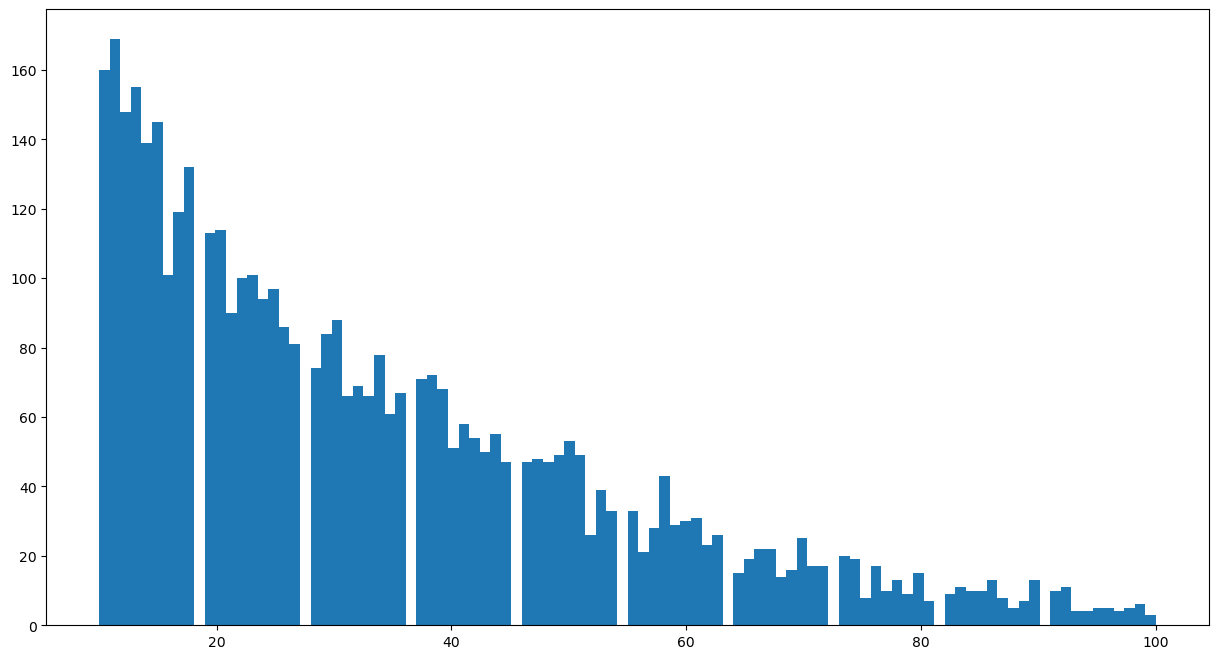

In [46]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['games_injured'] >= 10)  & (df['games_injured'] <= 100 )]['games_injured'],bins=100);
df[(df['games_injured'] >= 10)  & (df['games_injured'] <= 100 )].shape

In [54]:
df=df[(df['games_injured'] >= 1)  & (df['games_injured'] <= 100 )]

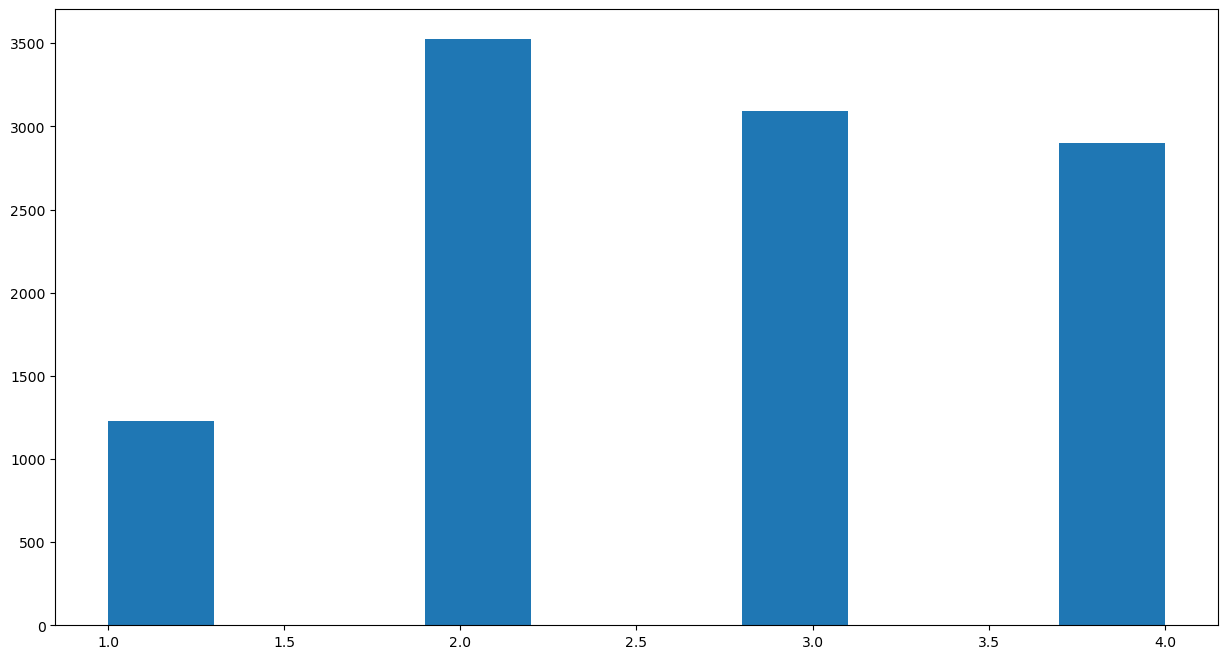

In [48]:
plt.figure(figsize=(15,8))
plt.hist(df['position_encoded']);

(10321, 17)

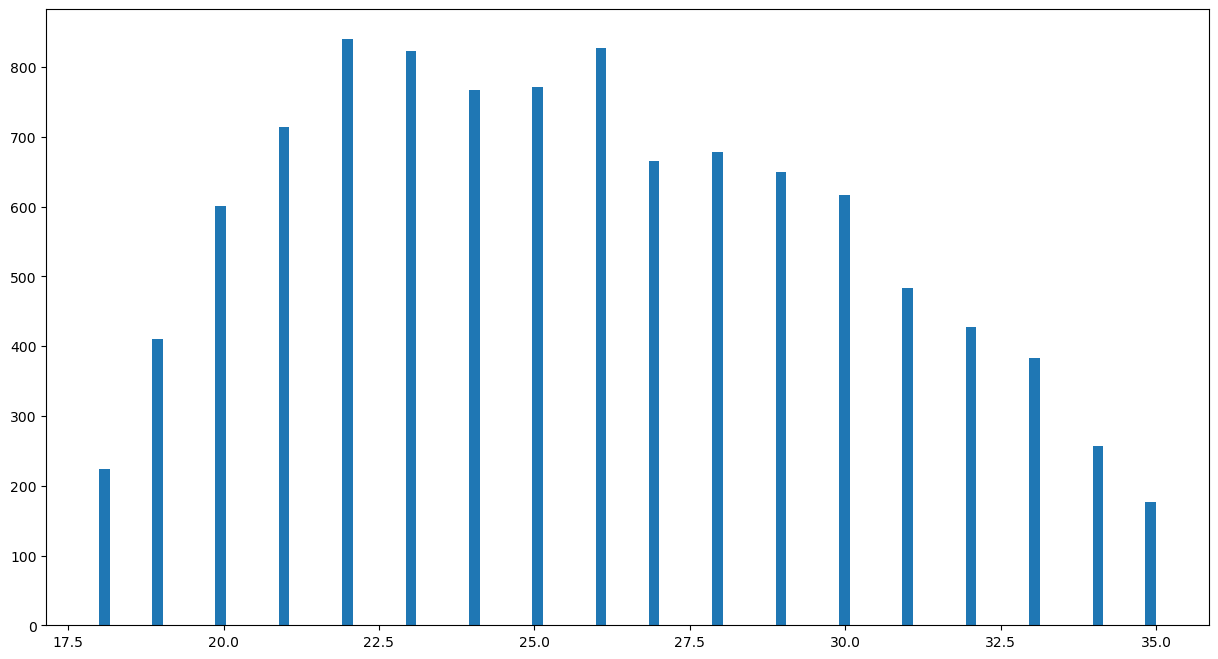

In [50]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['age'] >= 18)  & (df['age'] <= 35 )]['age'],bins=100);
df[(df['age'] >= 18)  & (df['age'] <= 35 )].shape


In [52]:
df = df[(df['age'] >= 18)  & (df['age'] <= 35 )]

In [60]:
df.shape

(6131, 17)

In [62]:
df.dtypes

team                    object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
current_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [69]:
categorical_features = ['team']

In [71]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [73]:
df.shape

(6131, 390)

In [75]:
df.head(1)

height   age  appearance  goals  assists  yellow cards  \
0   189.0  32.0         104    0.0      0.0      0.009585   

   second yellow cards  red cards  goals conceded  clean sheets  ...  \
0                  0.0        0.0        1.217252      0.335463  ...   

   team_West Ham United  team_Western Sydney Wanderers  \
0                 False                          False   

   team_Western United FC  team_Wigan Athletic  team_Wolfsberger AC  \
0                   False                False                False   

   team_Wolverhampton Wanderers  team_Yokohama F. Marinos  team_Yokohama FC  \
0                         False                     False             False   

   team_Zenit St. Petersburg  team_Ümraniyespor  
0                      False              False  

[1 rows x 390 columns]

In [77]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

#here it is not responde for run

current_value           1.000000
minutes played          0.437060
appearance              0.435502
team_Manchester City    0.223047
team_Bayern Munich      0.194698
                          ...   
team_Rapid Vienna      -0.027678
team_SV Ried           -0.028807
team_SCR Altach        -0.029391
goals conceded         -0.065176
age                    -0.148831
Name: current_value, Length: 390, dtype: float64


In [79]:
threshold = 0.2 

selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value',
       'team_Manchester City'],
      dtype='object')

In [87]:
selected_features = ['appearance', 'minutes played', 'current_value',
       'team_Manchester City']

In [89]:
df = df[selected_features]
df.head(1)

appearance  minutes played  current_value  team_Manchester City
0         104            9390       15000000                 False

In [91]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X.shape

(6131, 3)

In [97]:
model = LinearRegression()


In [99]:
ridge_model = Ridge() 

In [101]:
lasso_model = Lasso()

In [103]:
param_grid = {
    'alpha': [0, 0.003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [105]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
# Fit GridSearchCV on the training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\96653\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\96653\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\96653\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+17, tolerance: 5.059e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Best Parameters for ridge model: {'alpha': 0}
Best Parameters for lasso model: {'alpha': 0}


C:\Users\96653\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.398e+17, tolerance: 6.242e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [109]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled)                  # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

In [111]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients


In [113]:
coeff_df

Coefficient
appearance            2.561500e+06
minutes played        2.460462e+06
team_Manchester City  1.932523e+06

In [115]:
coeff_df_ridge

Coefficient
appearance            2.561500e+06
minutes played        2.460462e+06
team_Manchester City  1.932523e+06

In [117]:

coeff_df_lasso

Coefficient
appearance            2.561500e+06
minutes played        2.460462e+06
team_Manchester City  1.932523e+06

In [119]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 5346788.336052203


In [121]:
print(f" Ridge model intercept: {best_model_ridge.intercept_}") 


 Ridge model intercept: 5346788.336052203


In [123]:
print(f" Lasso model intercept: {best_model_lasso.intercept_}") 


 Lasso model intercept: 5346788.336052203


In [125]:
y_base = [y_train.mean()] * len(y_test)

In [127]:

# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.258682e+14


In [129]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 9.777912e+13
Mean Squared Error for testing: 9.593158e+13


In [131]:
# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge:2e}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge:2e}')

Mean Squared Error for training ridge model: 9.777912e+13
Mean Squared Error for testing ridge model: 9.593158e+13


In [133]:
# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso:2e}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso:2e}')

Mean Squared Error for training lasso model: 9.777912e+13
Mean Squared Error for testing lasso model: 9.593158e+13


In [135]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 5.907822e+06


In [137]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 5.557534e+06
Mean Absolute Error for testing: 5.513856e+06


In [139]:
# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge:2e}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge:2e}')

Mean Absolute Error for training ridge model: 5.557534e+06
Mean Absolute Error for testing ridge model: 5.513856e+06


In [141]:
# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso:2e}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso:2e}')

Mean Absolute Error for training lasso model: 5.557534e+06
Mean Absolute Error for testing lasso model: 5.513856e+06


In [143]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 1.121910e+07


In [145]:

# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 9.888333e+06
Root Mean Squared Error for testing: 9.794467e+06


In [147]:
# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge):2e}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge):2e}')

Root Mean Squared Error for training ridge model: 9.888333e+06
Root Mean Squared Error for testing ridge model: 9.794467e+06


In [149]:
# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso):2e}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso):2e}')

Root Mean Squared Error for training lasso model: 9.888333e+06
Root Mean Squared Error for testing lasso model: 9.794467e+06


In [151]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.2317882148757754
R Square for testing: 0.2378037445169362


In [153]:
# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

R Square for training ridge model: 0.2317882148757756
R Square for testing ridge model: 0.2378037445169362


In [155]:
# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training lasso model: 0.2317882148757755
R Square for testing lasso model: 0.2378037445169362


In [157]:

predictions = model.predict(X_test_scaled)
#predictions

In [159]:
Real_Values = np.array(y_test)
# Real_Values

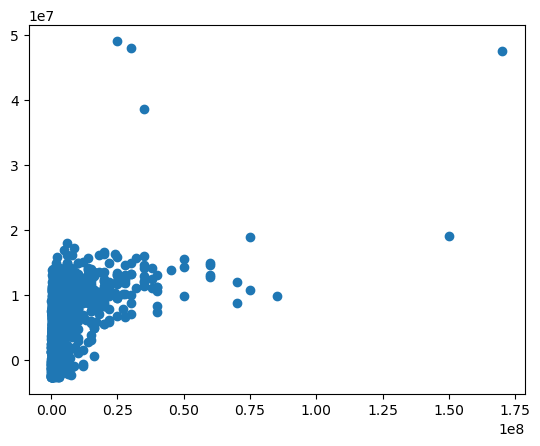

In [161]:
plt.scatter(Real_Values,predictions); 

C:\Users\96653\AppData\Local\Temp\ipykernel_15160\1621151396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions)); # it's good if we get normal distribution


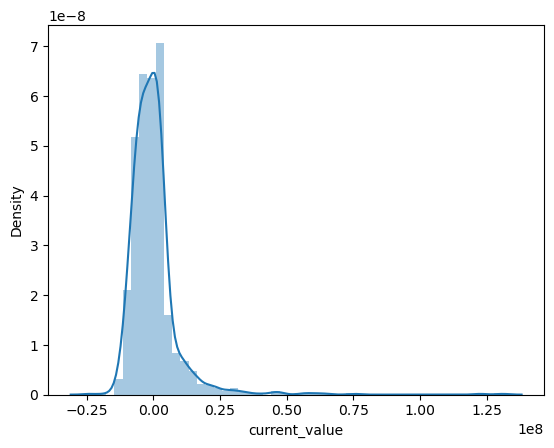

In [163]:
sns.distplot((y_test-predictions)); # it's good if we get normal distribution